![Data_Layer](img\EDA.png)


# EDA Layer

**EDA comparisons** for TCS stock data, analyzing trends, volume, prices, technical indicators, and corporate actions.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load enriched dataset
df = pd.read_csv("data/cleaned_TCS_stock_history.csv")
df['Date'] = pd.to_datetime(df['Date'])
sns.set(style='whitegrid')


## 1. Avg 52W High vs Low

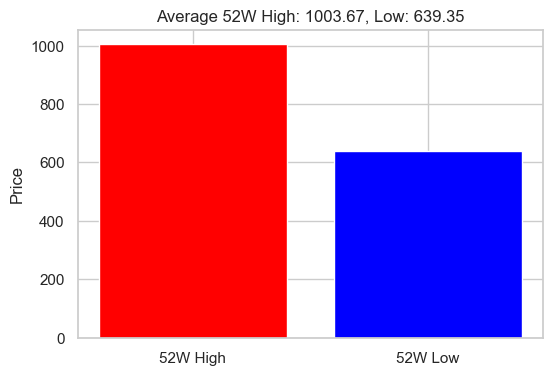

In [3]:
plt.figure(figsize=(6,4))
avg_high = df['High'].rolling(window=252).max().mean()
avg_low = df['Low'].rolling(window=252).min().mean()
plt.bar(['52W High', '52W Low'], [avg_high, avg_low], color=['red', 'blue'])
plt.title(f"Average 52W High: {avg_high:.2f}, Low: {avg_low:.2f}")
plt.ylabel("Price")
plt.show()


- Inference: The average 52-week high is significantly higher (1003.67) than the 52-week low (639.35), indicating wide market fluctuation over the year. This suggests considerable volatility or long-term bullish momentum.

---

## 2. Volume by Month

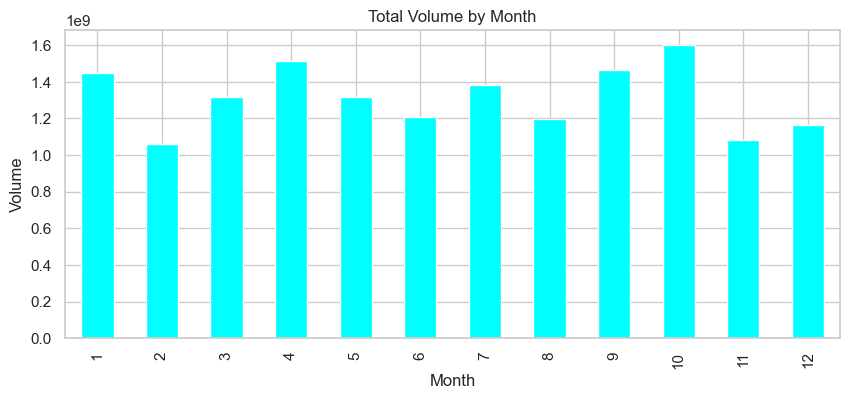

In [18]:
plt.figure(figsize=(10,4))
monthly_vol = df.groupby(df['Month'])['Volume'].sum()
monthly_vol.plot(kind='bar', color='cyan')
plt.title("Total Volume by Month")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.show()


- Inference: October and April exhibit the highest trading volumes, implying heightened trading activity possibly linked to quarterly results, dividends, or fiscal year endings. February and November have comparatively lower interest.
---

## 3. Close vs Open by Day

<Figure size 1200x400 with 0 Axes>

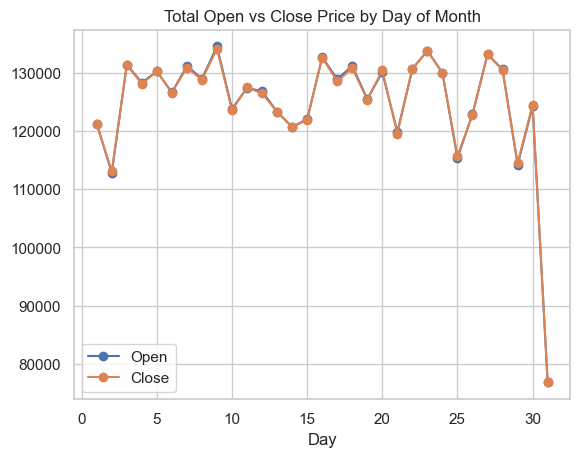

In [5]:
plt.figure(figsize=(12,4))
daily_sum = df.groupby(df['Day'])[['Open', 'Close']].sum()
daily_sum.plot(kind='line', marker='o')
plt.title("Total Open vs Close Price by Day of Month")
plt.grid(True)
plt.show()


- Inference: Prices remain fairly stable throughout the month, with minor variations. However, there is a noticeable dip on the 30th, possibly due to end-of-month corrections or low liquidity.
---

## 4. Weekday Trends

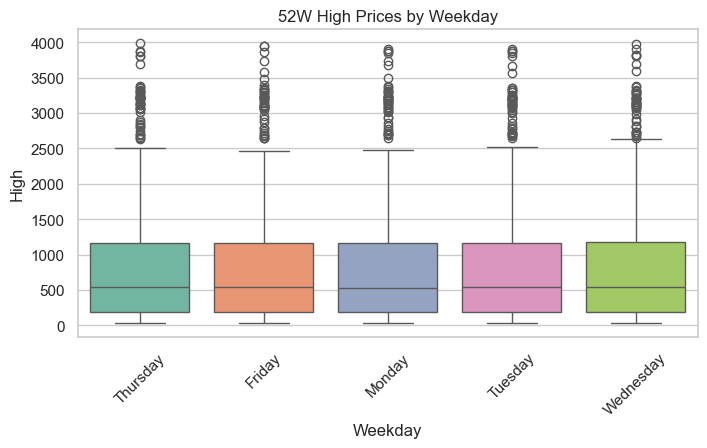

In [6]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Weekday', y='High', data=df, palette="Set2")
plt.title("52W High Prices by Weekday")
plt.xticks(rotation=45)
plt.show()


- Inference: All weekdays show similar median 52W Highs, but Thursday and Tuesday have slightly more upward outliers. This could indicate increased price peaks or volatility around these days.
---

## 5. Rolling Mean

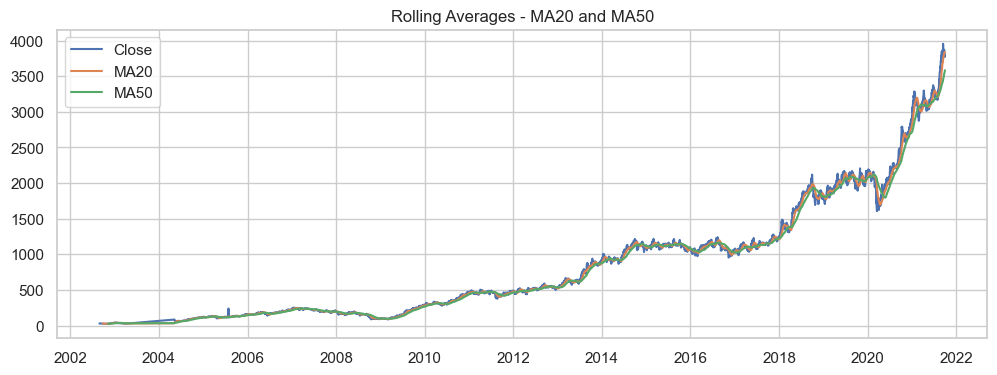

In [7]:
df['MA20'] = df['Close'].rolling(20).mean()
df['MA50'] = df['Close'].rolling(50).mean()
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA20'], label='MA20')
plt.plot(df['Date'], df['MA50'], label='MA50')
plt.legend()
plt.title("Rolling Averages - MA20 and MA50")
plt.show()


- Inference: The 20-day and 50-day moving averages closely follow the closing price. MA20 reacts faster to price changes, while MA50 shows the broader trend. This helps identify bullish/bearish crossovers and momentum shifts.
---

## 6. Correlation Heatmap

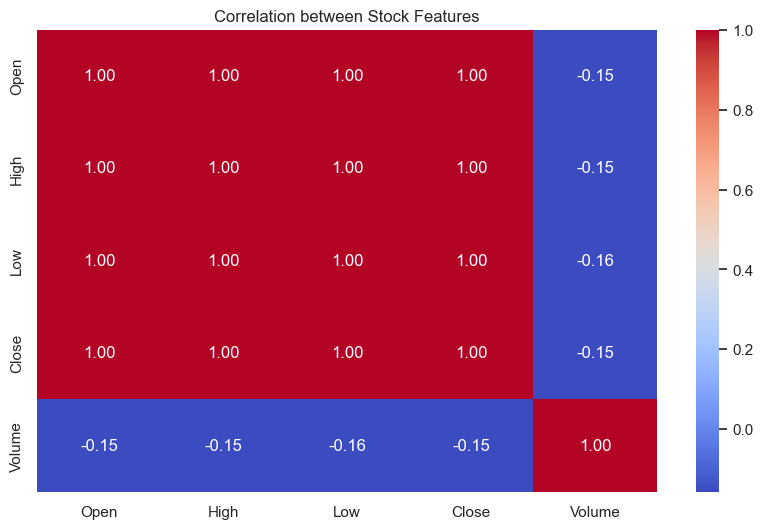

In [8]:
plt.figure(figsize=(10, 6))
corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Stock Features")
plt.show()


- Inference: Open, High, Low, and Close are highly positively correlated (close to 1), as expected in OHLC datasets. Volume, however, shows a weak negative correlation, suggesting it behaves independently from price trends.
---

## 7. Daily Return Distribution

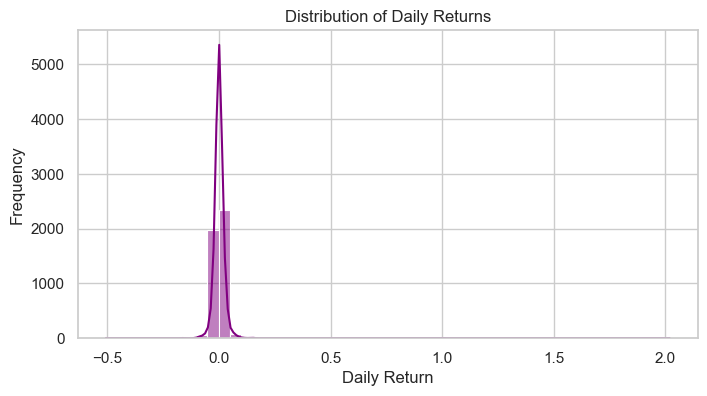

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True, color='purple')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()


- Inference: Daily returns follow a roughly normal distribution with a sharp peak around 0. Most returns are centered near zero, with some outliers indicating strong gains or losses on rare days.
---

## 8. Cumulative Returns

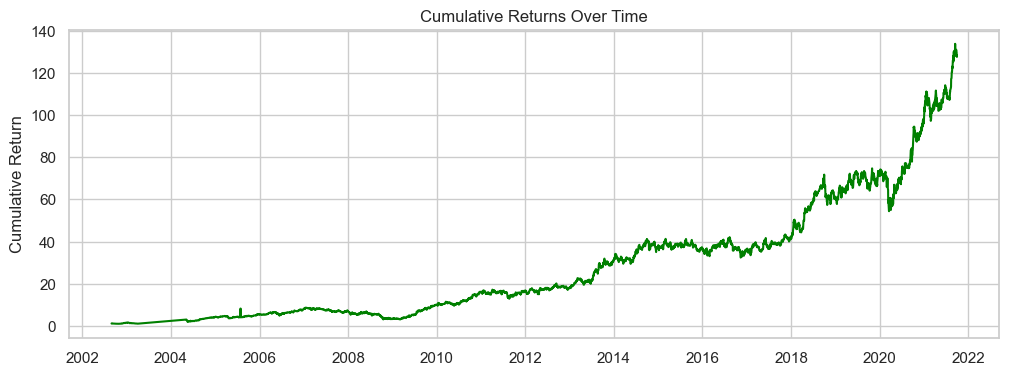

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Cumulative Return'], label="Cumulative Return", color='green')
plt.title("Cumulative Returns Over Time")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()


- Inference: TCS stock shows consistent long-term growth. There are occasional dips, but overall cumulative returns have steadily risen highlighting TCS as a potentially strong long-term investment.
---

## 9. MACD Crossovers

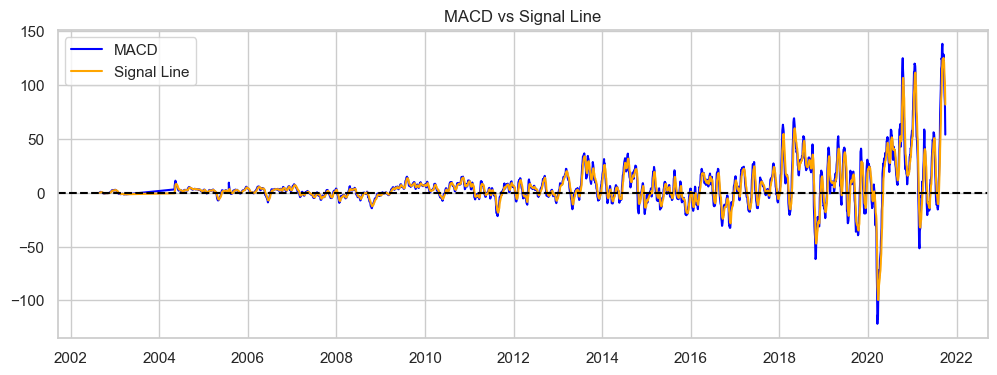

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['MACD'], label='MACD', color='blue')
plt.plot(df['Date'], df['Signal_Line'], label='Signal Line', color='orange')
plt.axhline(0, linestyle='--', color='black')
plt.title("MACD vs Signal Line")
plt.legend()
plt.show()


- Inference: MACD crosses above the signal line typically indicate bullish momentum, while crossing below suggests bearish trends. These crossovers align with key price shifts in TCS over time.
---

## 10. RSI Overbought/Oversold levels

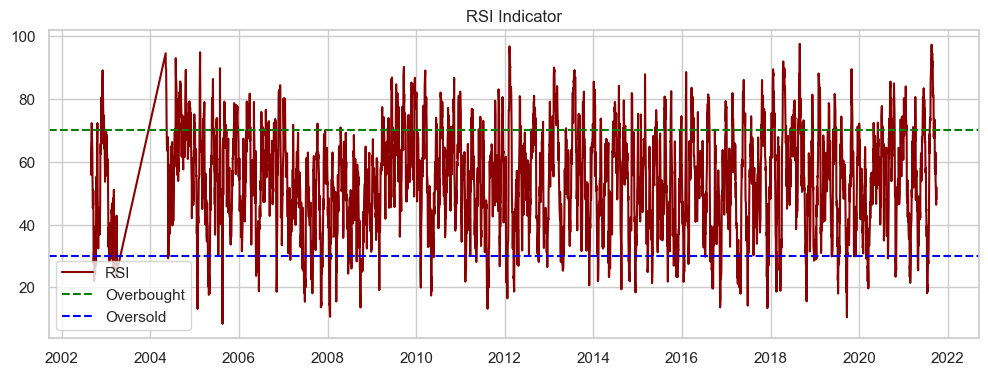

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['RSI'], label='RSI', color='darkred')
plt.axhline(70, linestyle='--', color='green', label='Overbought')
plt.axhline(30, linestyle='--', color='blue', label='Oversold')
plt.title("RSI Indicator")
plt.legend()
plt.show()


- Inference: The RSI frequently crosses above 70 (overbought) and below 30 (oversold), providing useful entry/exit signals. The constant fluctuation indicates active market dynamics with short-term buying/selling cycles.
---

## 11. Stock Splits impact on Volume

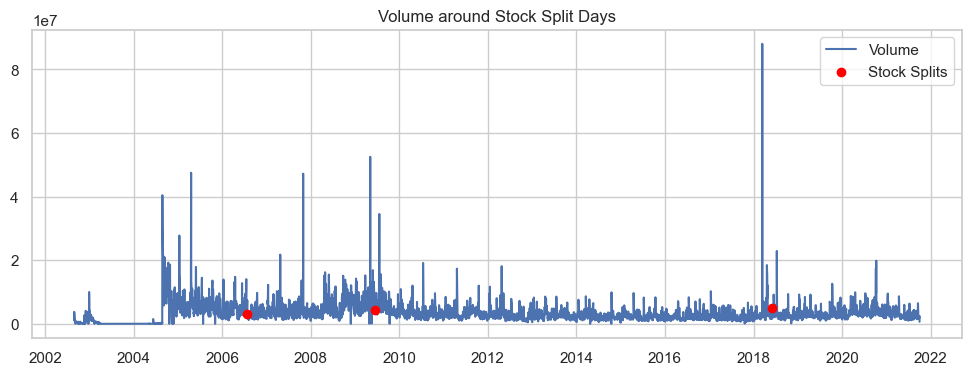

In [13]:
split_days = df[df['Stock Splits'] > 0]
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Volume'], label='Volume')
plt.scatter(split_days['Date'], split_days['Volume'], color='red', label='Stock Splits', zorder=5)
plt.title("Volume around Stock Split Days")
plt.legend()
plt.show()


- Inference: There is a significant spike in trading volume around stock split events (highlighted in red), particularly in 2018 and earlier years. This indicates increased investor interest and speculative activity around split announcements, making them high-volatility days.
---

## 12. Dividend Events impact on Price

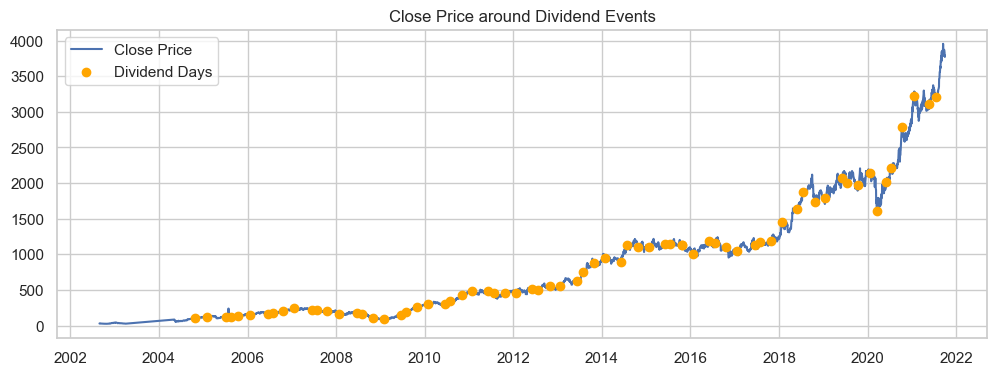

In [14]:
dividend_days = df[df['Dividends'] > 0]
plt.figure(figsize=(12, 4))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.scatter(dividend_days['Date'], dividend_days['Close'], color='orange', label='Dividend Days', zorder=5)
plt.title("Close Price around Dividend Events")
plt.legend()
plt.show()


- Inference: Dividend events (orange dots) align with minor fluctuations in close price. The stock generally maintains upward momentum, indicating that dividend issuance does not negatively impact long-term price growth and may attract consistent investors.
---

## 13. Monthly Aggregated Highs/Lows

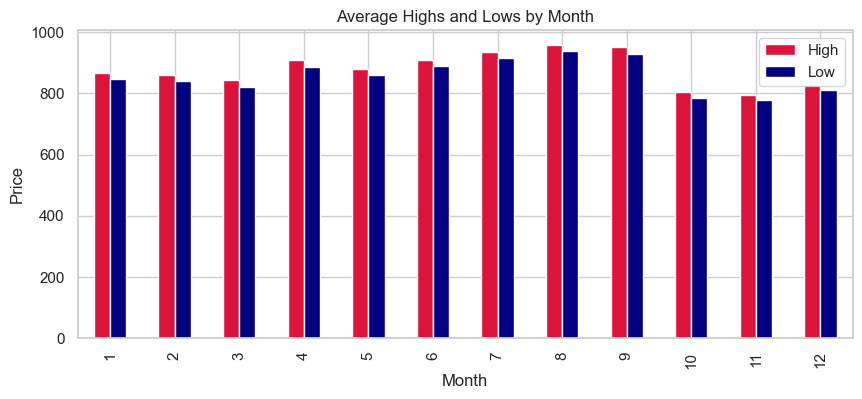

In [15]:
monthly = df.groupby(df['Month'])[['High', 'Low']].mean()
monthly.plot(kind='bar', figsize=(10, 4), color=['crimson', 'navy'])
plt.title("Average Highs and Lows by Month")
plt.ylabel("Price")
plt.show()


- Inference: August and September show the highest average highs and lows, indicating strong performance in late Q2 and Q3. October and November exhibit a noticeable dip, possibly reflecting seasonal corrections or post-result slowdowns.
---

## 14. Year-on-Year Close Price Comparison

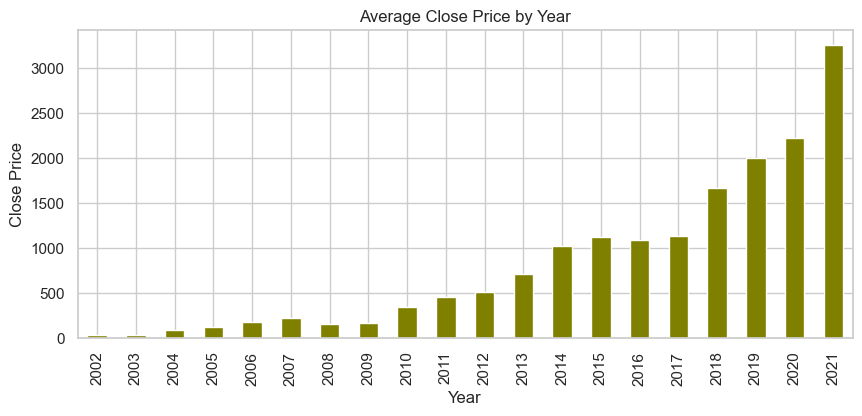

In [16]:
yearly_avg = df.groupby(df['Year'])['Close'].mean()
yearly_avg.plot(kind='bar', figsize=(10, 4), color='olive')
plt.title("Average Close Price by Year")
plt.ylabel("Close Price")
plt.show()


- Inference: There is a consistent year-on-year rise in the average closing price, with a sharp surge from 2018 to 2021. This reinforces TCS’s long-term growth story and suggests strong investor confidence over time.
---

## 15. Sector Benchmark Comparison

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


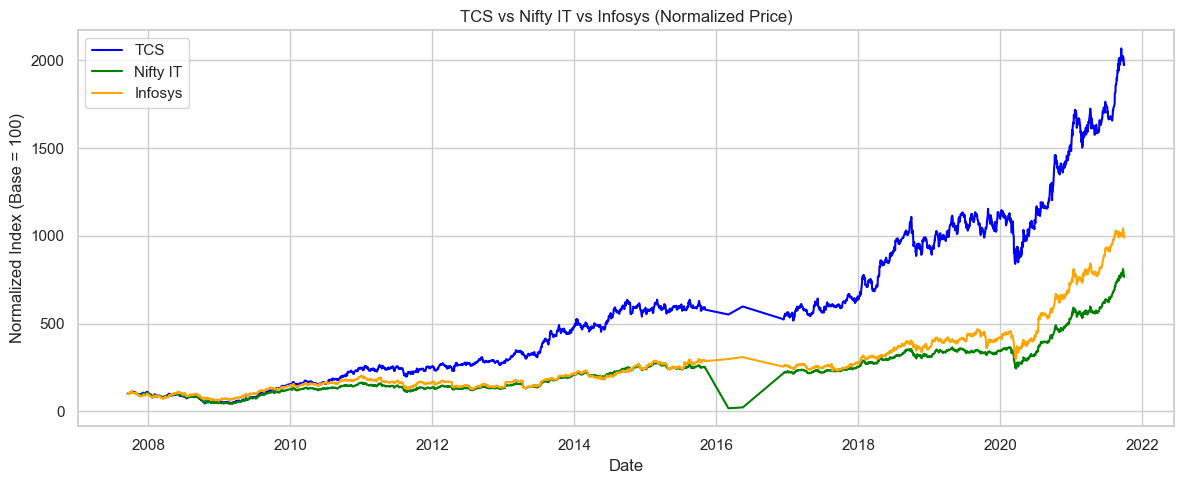

In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download benchmark data
nifty_it = yf.download("^CNXIT", start="2002-08-01")
infy = yf.download("INFY.NS", start="2002-08-01")

# Flatten columns if MultiIndex
if isinstance(nifty_it.columns, pd.MultiIndex):
    nifty_it.columns = ['_'.join(filter(None, col)).strip() for col in nifty_it.columns.values]
if isinstance(infy.columns, pd.MultiIndex):
    infy.columns = ['_'.join(filter(None, col)).strip() for col in infy.columns.values]

# Reset index to expose 'Date' column
nifty_it = nifty_it.reset_index()
infy = infy.reset_index()

# Automatically find correct 'Close' column
nifty_close_col = [col for col in nifty_it.columns if 'Close' in col][0]
infy_close_col = [col for col in infy.columns if 'Close' in col][0]

# Cleaned benchmark data
nifty_it = nifty_it[['Date', nifty_close_col]].rename(columns={nifty_close_col: 'NIFTY_IT_Close'})
infy = infy[['Date', infy_close_col]].rename(columns={infy_close_col: 'INFY_Close'})

# TCS prep (flatten if needed)
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(filter(None, col)).strip() for col in df.columns.values]

df['Date'] = pd.to_datetime(df['Date'])
tcs = df[['Date', 'Close']].rename(columns={'Close': 'TCS_Close'})

# Merge all three
merged = pd.merge(tcs, nifty_it, on='Date', how='inner')
merged = pd.merge(merged, infy, on='Date', how='inner')

# Normalize to 100
merged['TCS_Norm'] = merged['TCS_Close'] / merged['TCS_Close'].iloc[0] * 100
merged['NIFTY_IT_Norm'] = merged['NIFTY_IT_Close'] / merged['NIFTY_IT_Close'].iloc[0] * 100
merged['INFY_Norm'] = merged['INFY_Close'] / merged['INFY_Close'].iloc[0] * 100

# Final plot
plt.figure(figsize=(12, 5))
plt.plot(merged['Date'], merged['TCS_Norm'], label='TCS', color='blue')
plt.plot(merged['Date'], merged['NIFTY_IT_Norm'], label='Nifty IT', color='green')
plt.plot(merged['Date'], merged['INFY_Norm'], label='Infosys', color='orange')
plt.title("TCS vs Nifty IT vs Infosys (Normalized Price)")
plt.xlabel("Date")
plt.ylabel("Normalized Index (Base = 100)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


- Inference: TCS has significantly outperformed both Infosys and the Nifty IT index over the observed period. Its trajectory shows smoother and stronger compounding growth, indicating its leadership and resilience in the Indian IT sector.

---